Импорт библиотек

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import pandas as pd

Чтение файла

In [3]:
with open('Москва_2021.txt', 'r') as file:
    boba = list(map(int, file.readlines()))
print(boba)

[23, 32, 27, 26, 44, 49, 63, 34, 66, 66, 38, 27, 28, 35, 26, 46, 62, 44, 22, 35, 31, 31, 27, 37, 32, 49, 31, 22, 18, 29, 30, 20, 31, 18, 69, 36, 28, 38, 62, 25, 38, 32, 31, 18, 48, 38, 40, 21, 25, 27, 44, 45, 29, 41, 24, 19, 29, 67, 41, 44, 25, 22, 42, 40, 21, 44, 29, 34, 63, 32, 49, 34, 35, 23, 45, 26, 36, 46, 36, 45, 38, 31, 24, 29, 41, 31, 27, 41, 33, 20, 45, 25, 40, 41, 32, 20, 41, 41, 57, 47, 22, 63, 21, 43, 19, 30, 25, 41, 44, 27, 34, 33, 26, 47, 19, 43, 48, 30, 19, 33, 36, 29, 27, 36, 45, 34, 20, 48, 32, 20, 66, 23, 48, 26, 43, 26, 22, 41, 19, 55, 21, 43, 45, 34, 25, 49, 19, 35, 51, 18, 34, 24, 42, 19, 37, 21, 31, 34, 32, 47, 49, 23, 35, 24, 29, 48, 29, 36, 34, 39, 39, 25, 23, 52, 31, 33, 48, 35, 24, 25, 28, 30, 34, 34, 19, 29, 39, 33, 38, 25, 47, 19, 31, 19, 22, 27, 27, 24, 38, 31, 33, 27, 22, 25, 32, 28, 24, 48, 37, 18, 28, 23, 56, 38, 30, 38, 29, 36, 19, 40, 41, 25, 26, 36, 25, 51, 22, 23, 21, 27, 21, 32, 42, 49, 26, 29, 27, 18, 30, 38, 22, 25, 25, 48, 21, 38, 49, 60, 64, 29,

Задание №1: Построение выборок и подсчет средних

In [14]:
# Подсчет объема выборок
y = 0.95
# Φ(t) = 0.95/2 = 0,4750. По функции Лапласа:
t = 1.96
N = 32423
d = 3
D = 144.9169680648149

n = math.ceil(t**2*D/d**2) #в большую сторону

print(f'Объем выборок: {n}')

# Функция для вычисления выборочной средней
def calculate_average(selection):
    total = 0
    for age in selection:
        total += age
    return total / len(selection)

# Генерация выборок и расчет выборочной средней
averages = []
selections = []
for _ in range(36):
    selection = random.choices(boba, k=n)
    selections.append(selection)
    average = calculate_average(selection)
    averages.append(average)

# Результаты
print(f'Выборочные средние: {averages}')
print(f'Выборки: {selections}')

Объем выборок: 62
Выборочные средние: [36.854838709677416, 36.53225806451613, 36.306451612903224, 35.096774193548384, 34.403225806451616, 37.29032258064516, 35.274193548387096, 34.79032258064516, 35.53225806451613, 33.5, 35.62903225806452, 34.20967741935484, 34.516129032258064, 34.46774193548387, 35.20967741935484, 35.354838709677416, 35.46774193548387, 36.17741935483871, 36.645161290322584, 35.04838709677419, 35.435483870967744, 36.33870967741935, 35.70967741935484, 34.274193548387096, 36.88709677419355, 34.483870967741936, 35.903225806451616, 36.96774193548387, 34.016129032258064, 36.96774193548387, 35.435483870967744, 35.29032258064516, 34.91935483870968, 37.403225806451616, 36.12903225806452, 33.16129032258065]
Выборки: [[24, 41, 31, 19, 18, 42, 45, 52, 47, 47, 49, 23, 26, 20, 41, 36, 47, 51, 35, 51, 24, 44, 47, 18, 49, 19, 26, 48, 19, 37, 39, 58, 48, 38, 28, 35, 47, 42, 18, 31, 41, 20, 47, 40, 65, 47, 67, 41, 46, 22, 22, 21, 19, 50, 38, 36, 28, 23, 36, 19, 35, 62], [22, 25, 58, 44

Задание №2: построить интервальный ряд распределения, вычислить относительные частоты, построить гистограмму.

33 38


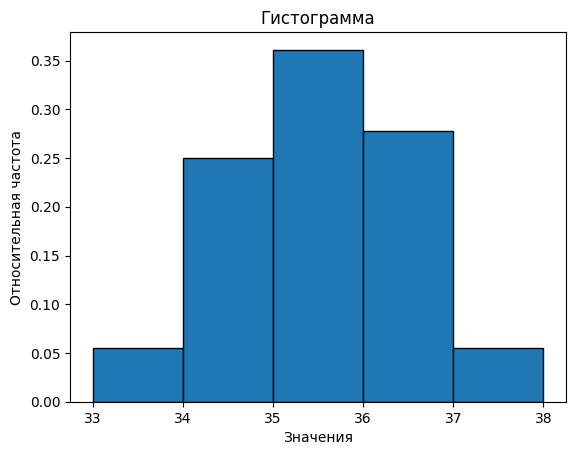

In [47]:
# Сортируем массив averages и берем уникальные значения
sortedAverages = sorted(averages)
leftBorder = math.floor(min(averages))
rightBorder = math.ceil(max(averages))

print(leftBorder,rightBorder)

intervals = np.arange(leftBorder, rightBorder + 1)
counts, _ = np.histogram(sortedAverages, bins = intervals)
freq = counts / len(sortedAverages)


for i in range(len(counts)):    
    interval = f"{intervals[i]}-{intervals[i + 1]}"

plt.hist(sortedAverages, bins = intervals, range = (leftBorder, rightBorder), edgecolor='black', density = True)

plt.title('Гистограмма')
plt.xlabel('Значения')
plt.ylabel('Относительная частота')

plt.show()

Задание №3: осуществить выравнивание статистического ряда, построить кривую Гаусса.

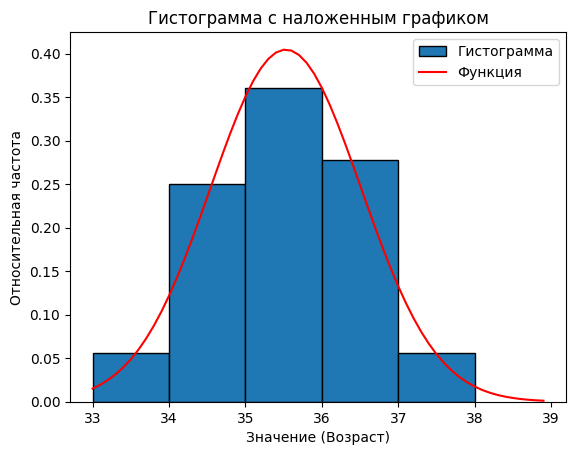

In [48]:
def AverageInterval(intervals, freq):
    result = 0
    for i in range(len(freq)):
        result += (intervals[i] + intervals[i + 1]) / 2 * freq[i]
    return result
average = AverageInterval(intervals, freq)

def DispersionInterval(intervals, freq):
    average = AverageInterval(intervals, freq)
    result = 0
    for i in range(len(freq)):
        result += (((intervals[i] + intervals[i + 1]) / 2 - average) ** 2) * freq[i]
    return result

def StandardDeviationInterval(intervals, freq):
    disp = DispersionInterval(intervals, freq)   
    return disp ** 0.5
kvad = StandardDeviationInterval(intervals, freq)

def NormRasp(value, average, kvad):    
    result = 1 / (kvad * math.sqrt(2 * math.pi)) * math.exp(-((value - average) ** 2) / (2 * kvad ** 2))
    return result

normValues = []
for i in range(len(intervals)):    
    currentNormValue = NormRasp(intervals[i],  average, kvad)
    normValues.append(currentNormValue)

plt.hist(sortedAverages, bins = intervals, range = (leftBorder, rightBorder), edgecolor='black', density = True, label = "Гистограмма")
normValues = []
intervals1 = np.arange(leftBorder, rightBorder + 1, 0.1)
for i in range(len(intervals1)):    
    currentNormValue = NormRasp(intervals1[i], average, kvad)    
    normValues.append(currentNormValue)
plt.plot(intervals1, normValues, label='Функция',  color='red')
plt.legend()
plt.title('Гистограмма с наложенным графиком')
plt.xlabel('Значение (Возраст)')
plt.ylabel('Относительная частота')
plt.show()

Задание №4: найти доверительный интервал

In [13]:
# Оценка среднего и дисперсии
mean = sum(selections[0]) / len(selections[0])
variance = sum((x - mean_sample) ** 2 for x in selections[0]) / (len(selections[0]) - 1)

# Уровень значимости
alpha = 0.05  # (1 - y)
n = len(selections[0])

# t-критическое значение
t_critical = 2  # Для 35 степеней свободы (n-1) и уровня значимости 0.05 

# Стандартная ошибка
standard_error = (variance / n) ** 0.5  

# Доверительный интервал
confidence_interval = (mean - t_critical * standard_error,
                       mean + t_critical * standard_error)

print(f"Доверительный интервал для среднего возраста: {confidence_interval}")
print(f'Ошибка: {t_critical * standard_error}')
print(f'Средняя: {mean}')


Доверительный интервал для среднего возраста: (33.35951586224558, 38.67327102300032)
Ошибка: 2.6568775803773663
Средняя: 36.01639344262295
